In [51]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#import api keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [52]:
# Target User Accounts
target_user = ("@bbc", "@cbs", "@cnn", "@foxnews", "@nytimes")

#list to store 100 tweets from each news outlet

news_source = []
compound = []
pos = []
neu = []
neg = []


tweets_ago = []

In [53]:
for user in target_user:
    counter = 0
    for x in range(0, 5):
        # Get all tweets from home feed
            public_tweets = api.user_timeline(user, page=x)

            # Loop through all tweets
            for tweet in public_tweets:
                counter += 1
                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                news_source.append(user)
                compound.append(results["compound"])
                pos.append(results["pos"])
                neu.append(results["neu"])
                neg.append(results["neg"])
                tweets_ago.append(counter)
                
news_df = pd.DataFrame({"news_source" : news_source, "compound" : compound, "positive" : pos, "neutral": neu, "negative": neg, "tweets_ago": tweets_ago})

In [54]:
news_df.head()

,compound,negative,neutral,news_source,positive,tweets_ago
0,-0.6369,0.25,0.652,@bbc,0.098,1
1,0.7650,0.00,0.680,@bbc,0.320,2
2,0.0000,0.00,1.000,@bbc,0.000,3
3,0.5994,0.00,0.786,@bbc,0.214,4
4,0.0000,0.00,1.000,@bbc,0.000,5


In [55]:
mean_news_df = news_df.groupby("news_source").mean()["compound"]

In [56]:
mean_news_df2 = pd.DataFrame(mean_news_df)

In [57]:
mean_news_df2
bbc_avg = mean_news_df2[mean_news_df.index=="@bbc"].values[0][0]
cbs_avg = mean_news_df2[mean_news_df.index=="@cbs"].values[0][0]
cnn_avg = mean_news_df2[mean_news_df.index=="@cnn"].values[0][0]
foxnews_avg = mean_news_df2[mean_news_df.index=="@foxnews"].values[0][0]
nytimes_avg = mean_news_df2[mean_news_df.index=="@nytimes"].values[0][0]

In [58]:
plot_news_df = news_df[["compound", "news_source", "tweets_ago"]]

bbc_list = plot_news_df[plot_news_df["news_source"]=="@bbc"]
cbs_list = plot_news_df[plot_news_df["news_source"]=="@cbs"]
cnn_list = plot_news_df[plot_news_df["news_source"]=="@cnn"]
foxnews_list = plot_news_df[plot_news_df["news_source"]=="@foxnews"]
nytimes_list = plot_news_df[plot_news_df["news_source"]=="@nytimes"]

mean_news_df2


,compound
news_source,
@bbc,0.001110
@cbs,0.379221
@cnn,0.013092
@foxnews,-0.016577
@nytimes,-0.076053


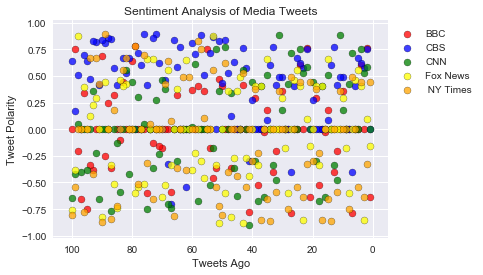

In [59]:
x_axis = tweets_ago


bbc = plt.scatter(bbc_list['tweets_ago'], bbc_list['compound'], marker="o", facecolors="red", edgecolors="black", alpha=0.75, label ="BBC")
cbs = plt.scatter(cbs_list['tweets_ago'], cbs_list['compound'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label = "CBS")
cnn = plt.scatter(cnn_list['tweets_ago'], cnn_list['compound'], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label = "CNN")
foxnews = plt.scatter(foxnews_list['tweets_ago'], foxnews_list['compound'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label = "Fox News")
nytimes = plt.scatter(nytimes_list['tweets_ago'], nytimes_list['compound'], marker="o", facecolors="orange", edgecolors="black", alpha=0.75, label = " NY Times")

plt.legend(bbox_to_anchor = [1,1], handles = [bbc, cbs, cnn, foxnews, nytimes])
plt.gca().invert_xaxis()
sns.set(style="darkgrid")
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig('output/detailed_media_sentiment.png')
plt.show()

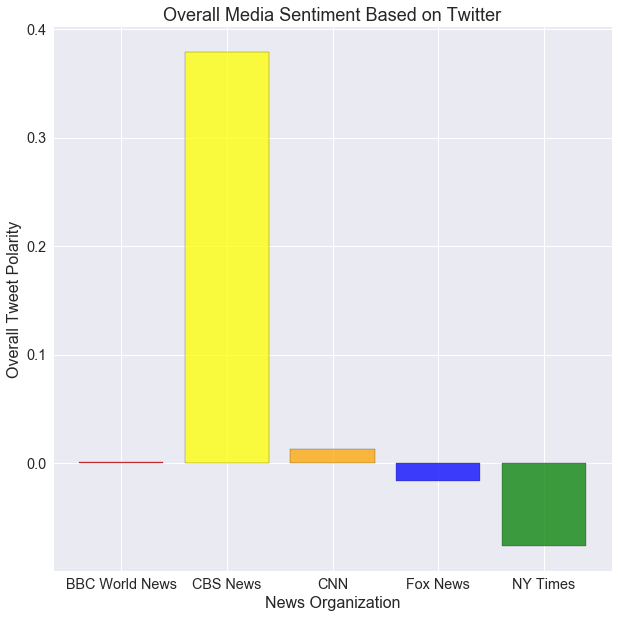

In [60]:
# plt.bar(mean_news_df2.index,mean_news_df2["compound"], color = ["red","blue","green","orange","yellow"])
# plt.subplots().set_yticklabels(mean_news_df2["compound"])
# plt.show()

N = 5

fig, ax = plt.subplots(figsize=(10,10))

ind = np.arange(N)


rects1 = ax.bar(ind[0], bbc_avg, color='red', edgecolor='black', alpha=0.75, label='BBC World News')
rects2 = ax.bar(ind[1], cbs_avg, color='yellow', edgecolor='black', alpha=0.75,label='CBS News')
rects3 = ax.bar(ind[2], cnn_avg, color='orange', edgecolor='black', alpha=0.75, label='CNN')
rects4 = ax.bar(ind[3], foxnews_avg, color='blue', edgecolor='black', alpha=0.75, label='Fox News')
rects5 = ax.bar(ind[4], nytimes_avg, color='green', edgecolor='black', alpha=0.75,label='NY Times')

#labels and legends
bar_title = 'Overall Media Sentiment Based on Twitter'
ax.set_title(bar_title, fontsize = 18)
ax.set_xlabel("News Organization", fontsize = 16)
ax.set_ylabel("Overall Tweet Polarity", fontsize = 16)
ax.tick_params(labelsize = 'large')
ax.set_xticklabels(('G1', 'BBC World News', 'CBS News', 'CNN', 'Fox News', 'NY Times'))

plt.savefig('output/overall_media_sentiment.png')

plt.show()